<a href="https://colab.research.google.com/github/GParker-VC/PythonClubAnalysis2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Python Club 2025/pneumonia_recovery_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.rename(columns={'patient_id': 'subject_id'}, inplace=True)
df.drop_duplicates(inplace = True )
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)
df['sex'] = df['sex'].str.capitalize()
df['age'] = pd. to_numeric (df['age'])

In [ ]:
mini_data = {
    'Category': ['A', 'B', 'A', 'B', 'B'],
    'Value' : [60, 50, 70, 80, 90]
}
mini_df = pd.DataFrame(mini_data)

In [ ]:
mini_df.head()

,Category,Value
0,A,60
1,B,50
2,A,70
3,B,80
4,B,90


In [ ]:
grouped_object = mini_df.groupby('Category')


In [ ]:
group_a  = grouped_object.get_group('A')
print(group_a)

  Category  Value
0        A     60
2        A     70


In [ ]:
grouped_mean = mini_df.groupby('Category')['Value'].mean()
print(grouped_mean)

Category
A    65.000000
B    73.333333
Name: Value, dtype: float64


In [ ]:
summary_stats = mini_df.groupby('Category')['Value'].agg(['mean','sum','count','std'])
print(summary_stats)

               mean  sum  count        std
Category                                  
A         65.000000  130      2   7.071068
B         73.333333  220      3  20.816660


In [ ]:
mini_df['Sex'] = ['M','F','F','M','M']

In [ ]:
mini_df.head()

,Category,Value,Sex
0,A,60,M
1,B,50,F
2,A,70,F
3,B,80,M
4,B,90,M


In [ ]:
mini_df.groupby(['Category','Sex'])['Value'].mean()

Category  Sex
A         F      70.0
          M      60.0
B         F      50.0
          M      85.0
Name: Value, dtype: float64

In [ ]:
mini_df.groupby(['Category','Sex'])['Value'].agg(['mean','sum','count'])

mean  sum  count
Category Sex                  
A        F    70.0   70      1
         M    60.0   60      1
B        F    50.0   50      1
         M    85.0  170      2

In [ ]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

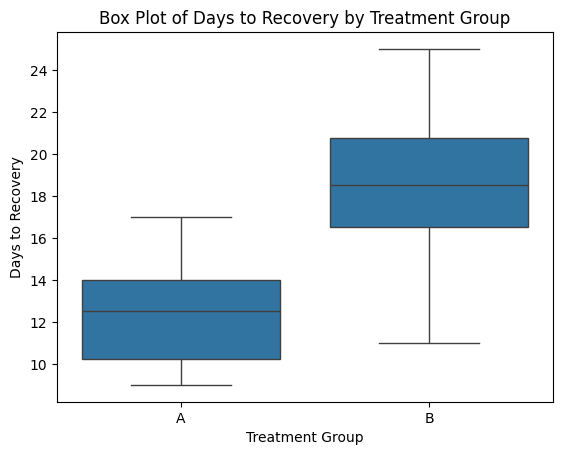

In [ ]:
# Our new change: a more descriptive title

sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Final Analysis: Box Plot of Days to Recovery by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
plt.show()

In [ ]:
df.groupby('treatment_group')['days_to_recovery'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_group,,,,,,,,
A,10.0,12.5,2.549510,9.0,10.25,12.5,14.00,17.0
B,10.0,18.3,4.423423,11.0,16.50,18.5,20.75,25.0


In [ ]:
df.groupby(['treatment_group','sex'])['days_to_recovery'].describe()

count    mean       std   min    25%   50%    75%  \
treatment_group sex                                                         
A               Female    2.0  10.500  0.707107  10.0  10.25  10.5  10.75   
                Male      8.0  13.000  2.618615   9.0  11.50  13.5  14.25   
B               Female    8.0  17.125  4.015595  11.0  15.00  18.0  19.25   
                Male      2.0  23.000  2.828427  21.0  22.00  23.0  24.00   

                         max  
treatment_group sex           
A               Female  11.0  
                Male    17.0  
B               Female  23.0  
                Male    25.0

In [ ]:
!pip install statannotations

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: t-test independent samples, P_val:2.082e-03 t=-3.592e+00


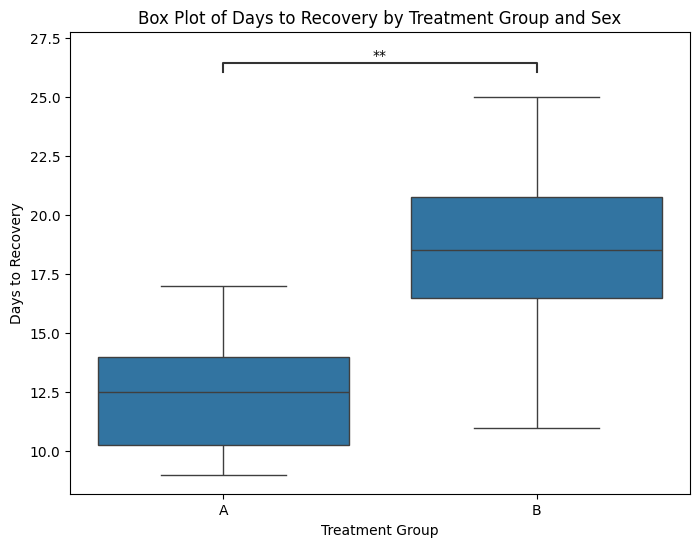

In [ ]:
from statannotations.Annotator import Annotator

plt.figure(figsize=(8,6))
ax=sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Box Plot of Days to Recovery by Treatment Group and Sex')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')

box_pairs = [("A", "B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.show()


In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
import docx
from docx.shared import Inches
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

group_a = df[df['treatment_group'] == 'A']['days_to_recovery']
group_b = df[df['treatment_group'] == 'B']['days_to_recovery']
group_a

,days_to_recovery
0,14
2,10
5,11
6,15
8,12
10,13
13,9
15,17
18,10
19,14


In [ ]:
t_stat,p_val = ttest_ind(group_a,group_b)

In [ ]:
# Format the p- value string for the report
if p_val < 0.001:
  p_text = "p < 0.001"
else:
  # Format to 4 decimal places
  p_text = f"p = { p_val:.4f}"

In [ ]:
print (f"Calculated text for report: {p_text}")

Calculated text for report: p = 0.0021


In [ ]:
# --- 2. Save the Annotated Plot Image ---
plt.figure ( figsize =(8 , 6))
ax = sns.boxplot(data=df , x='treatment_group',
  y='days_to_recovery')
plt.title ('Comparison of Recovery Time by Treatment Group')
box_pairs = [("A", "B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt. savefig ('annotated_plot.png')
plt. close () # Close plot to prevent duplicate display

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: t-test independent samples, P_val:2.082e-03 t=-3.592e+00


In [ ]:
doc = docx.Document ()
doc.add_heading ('Pneumonia Recovery Study : Final Report ', 0)
doc.add_heading ('Results ', level =1)
doc.add_paragraph(
  f"A statistically significant difference in recovery time was"
  f" observed between the two treatment groups . Patients in the"
  f" experimental group (A) recovered significantly faster than"
  f" those in the standard group (B), as determined by an"
  f" independent t- test ({ p_text })."
)
doc.add_picture('annotated_plot.png', width = Inches (6.0) )
doc.save (' Final_Report_Dynamic.docx ')
print (" Dynamic report generated successfully !")

 Dynamic report generated successfully !
